In [4]:
import pandas as pd

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_id = test["PassengerId"]


In [6]:
train

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8693 rows x 14 columns]

In [7]:
test

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0             0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1             0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2             0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3             0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4            10.0        0.0         635.0     0.0     0.0   Brence Harperez  
...           ...        ...           ...     ...     ...               ...  
4272          0.0        0.0           0.0     0.0     0.0       Jeron Peter  
4273          0.0      847.0          17.0    10.0   144.0     Matty Scheron  
4274          0.0        0.0           0.0     0.0     0.0       Jayrin Pore  
4275          0.0     2680.0           0.0     0.0   523.0    Kitakan Conale  
4276          0.0        0.0           0.0     0.0     0.0  Lilace Leonzaley  

[4277 rows x 13 columns]

In [8]:
train.shape

(8693, 14)

In [9]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:>

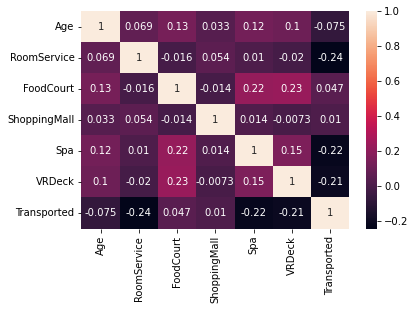

In [10]:
import seaborn as sns

sns.heatmap(train.corr(), annot=True)

In [11]:
def clean(train):
    train = train.drop(["Name"], axis=1)

    cols = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
    for col in cols:
        train[col].fillna(train[col].median(), inplace=True)
    
    return train

train = clean(train)
test = clean(test)

In [12]:
train.shape

(8693, 13)

In [13]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [14]:
def seperate(train):
    train[["Cabin_Deck","Cabin_Num","Cabin_Side"]] = train["Cabin"].str.split("/", expand=True)    
    return train

train = seperate(train)
test = seperate(test)

In [15]:
train.drop(["PassengerId","Cabin","Cabin_Num"], axis=1, inplace=True )

In [16]:
test.drop(["PassengerId","Cabin","Cabin_Num"], axis=1, inplace=True )

In [17]:
train.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Cabin_Deck      199
Cabin_Side      199
dtype: int64

In [19]:
!pip install missingno

<AxesSubplot:>

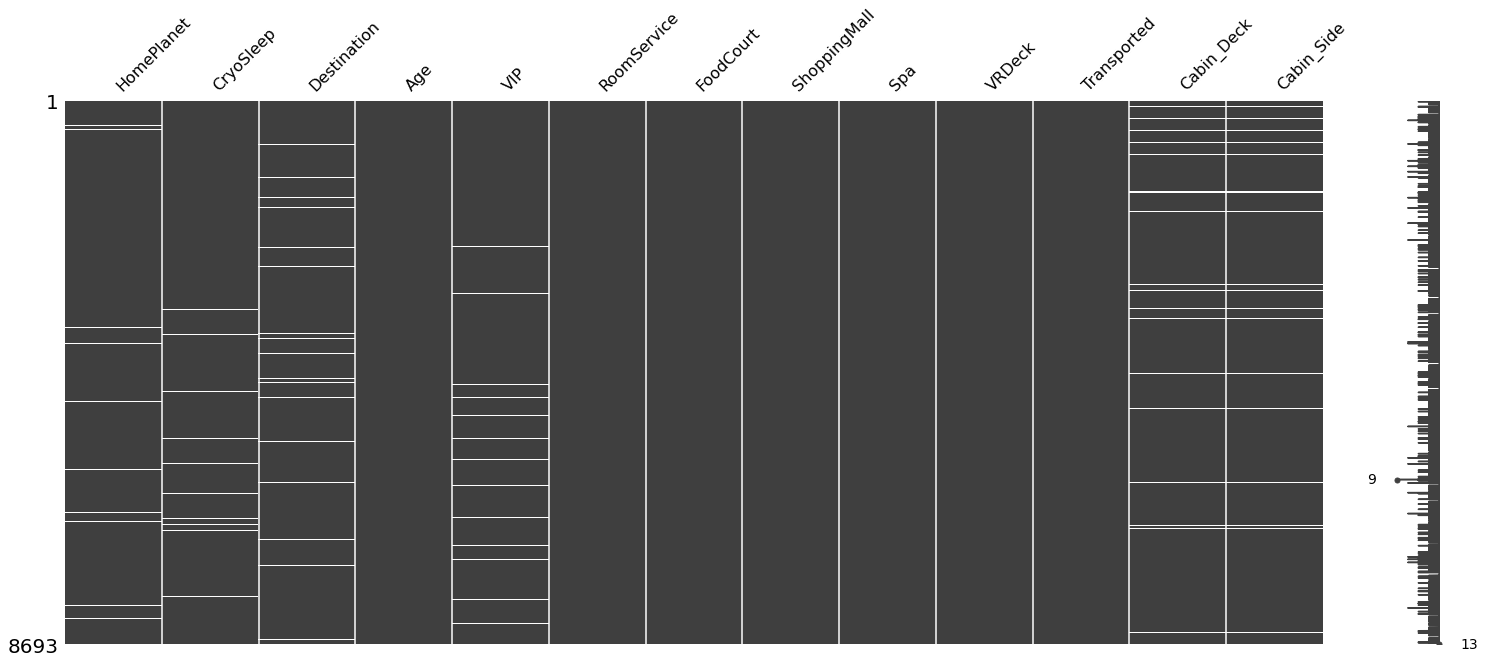

In [20]:
import missingno as msno
msno.matrix(train)

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Cabin_Deck", "Cabin_Side"]

for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    print(le.classes_)

train.head()

['Earth' 'Europa' 'Mars' nan]
[False True nan]
['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e' nan]
[False True nan]
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T' nan]
['P' 'S' nan]


HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0           1          0            2  39.0    0          0.0        0.0   
1           0          0            2  24.0    0        109.0        9.0   
2           1          0            2  58.0    1         43.0     3576.0   
3           1          0            2  33.0    0          0.0     1283.0   
4           0          0            2  16.0    0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported  Cabin_Deck  Cabin_Side  
0           0.0     0.0     0.0        False           1           0  
1          25.0   549.0    44.0         True           5           1  
2           0.0  6715.0    49.0        False           0           1  
3         371.0  3329.0   193.0        False           0           1  
4         151.0   565.0     2.0         True           5           1

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = train["Transported"]

X = train.drop("Transported", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [23]:
clf = LogisticRegression(random_state=0, max_iter=2000).fit(X_train, y_train)

In [24]:
preds = clf.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, preds)

0.7837837837837838

In [26]:
confusion_matrix(y_test, preds)

array([[678, 228],
       [148, 685]])

In [27]:
confusion_matrix(y_test, preds)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.82      0.75      0.78       906
        True       0.75      0.82      0.78       833

    accuracy                           0.78      1739
   macro avg       0.79      0.79      0.78      1739
weighted avg       0.79      0.78      0.78      1739



In [77]:
submission_preds = clf.predict(test)
submission_preds

array([ True, False,  True, ...,  True,  True,  True])

In [29]:
df = pd.DataFrame({"PassengerId": test_id.values,
"Transported": submission_preds,
})

In [30]:
df

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]

In [31]:
df.to_csv("submission.csv", index=False)
df

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]

## LightGBM

In [32]:
from lightgbm import LGBMClassifier

In [33]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [34]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8039102932719954

In [35]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [38]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)



In [39]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[CV] END learning_rate=0.1, max_depth=3, min_child_samples=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_samples=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_samples=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_samples=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_samples=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_samples=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_samples=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_samples=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=

GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [40]:
lgbm_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 6,
 'min_child_samples': 10,
 'n_estimators': 500,
 'subsample': 0.6}

In [41]:
lgbm = LGBMClassifier(learning_rate = 0.02, 
                       max_depth = 6,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 10)

In [42]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [43]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8021851638872916

In [76]:
submission_preds = lgbm_tuned.predict(test)
submission_preds

array([ True, False,  True, ...,  True,  True,  True])

In [78]:
df = pd.DataFrame({"PassengerId": test_id.values,
"Transported": submission_preds,
})

In [79]:
df

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]

In [80]:
df.to_csv("submission_lgbm.csv", index=False)
df

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]

## Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
cart = DecisionTreeClassifier()

In [49]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [50]:
cart_model

DecisionTreeClassifier()

In [51]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

/Users/mericgenc/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


((((((((((1 if x[3] <= 2.0 else 0 if x[11] <= 0.5 else 1) if x[0] <= 0.5 else
    1) if x[10] <= 5.5 else (((1 if x[11] <= 0.5 else 1) if x[10] <= 7.0 else
    0) if x[2] <= 1.5 else ((1 if x[11] <= 0.5 else ((1 if x[4] <= 1.0 else
    1) if x[11] <= 1.5 else 1) if x[2] <= 2.5 else 0) if x[3] <= 0.5 else 0 if
    x[11] <= 0.5 else 0) if x[0] <= 1.5 else 0) if x[3] <= 1.5 else (((0 if
    x[2] <= 1.0 else 0) if x[11] <= 0.5 else 1 if x[2] <= 0.5 else 0 if x[2
    ] <= 1.5 else 1) if x[3] <= 2.5 else ((1 if x[2] <= 0.5 else 1 if x[2] <=
    1.5 else 1) if x[11] <= 0.5 else 0) if x[3] <= 3.5 else ((0 if x[10] <=
    7.0 else 1) if x[3] <= 4.5 else 1) if x[2] <= 0.5 else 0 if x[2] <= 1.5
     else 0 if x[11] <= 0.5 else 0 if x[3] <= 4.5 else 0) if x[4] <= 1.0 else
    0) if x[3] <= 5.5 else ((((1 if x[10] <= 5.5 else ((1 if x[3] <= 6.5 else
    0 if x[3] <= 7.5 else 1) if x[2] <= 0.5 else (((0 if x[3] <= 6.5 else 1
    ) if x[2] <= 1.5 else 1 if x[3] <= 6.5 else 0) if x[3] <= 7.5 else 0 if

In [52]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7326049453709028

In [53]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [54]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min

In [55]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 6, 'min_samples_split': 37}


In [56]:
cart = tree.DecisionTreeClassifier(max_depth = 6, min_samples_split = 37)
cart_tuned = cart.fit(X_train, y_train)

In [57]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7619321449108684

## XGBoost

In [59]:
from xgboost import XGBClassifier

In [60]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [61]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7924094307073031

In [62]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [63]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [64]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[01:53:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:53:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:53:

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [65]:
xgb_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 2000,
 'subsample': 1.0}

In [67]:
xgb = XGBClassifier(learning_rate=0.02,
                    max_depth=3,
                    min_samples_split=2,
                    n_estimators=2000,
                    subsample=1.0)

In [68]:
xgb_tuned=xgb.fit(X_train,y_train)

[03:30:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [69]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7929844738355377

In [74]:
modeller = [
    clf,
    cart_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
LogisticRegression:
Accuracy: 78.3784%
----------------------------
DecisionTreeClassifier:
Accuracy: 76.1932%
----------------------------
LGBMClassifier:
Accuracy: 80.2185%
----------------------------
XGBClassifier:
Accuracy: 79.2984%
